In [ ]:
%load_ext sql


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%sql sqlite://///content/drive/MyDrive/TMDB.db


In [ ]:
result = %sql SELECT * from movies

df = result.DataFrame()

 * sqlite://///content/drive/MyDrive/TMDB.db
Done.


In [ ]:
df.head(2)

,movie_id,title,release_date,budget,homepage,original_language,original_title,overview,popularity,revenue,runtime,release_status,tagline,vote_average,vote_count
0,5,Four Rooms,1995-12-09 00:00:00.000000,4000000,None,en,Four Rooms,It's Ted the Bellhop's first night on the job....,22.876230,4300000.0,98.0,Released,Twelve outrageous guests. Four scandalous requ...,6.5,530
1,11,Star Wars,1977-05-25 00:00:00.000000,11000000,http://www.starwars.com/films/star-wars-episod...,en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,775398007.0,121.0,Released,"A long time ago in a galaxy far, far away...",8.1,6624


In [ ]:
df.describe()

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### mean for run time is 106 min

In [ ]:
df.isnull().sum()

,0
movie_id,0
title,0
release_date,1
budget,0
homepage,3091
original_language,0
original_title,0
overview,3
popularity,0
revenue,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop("homepage",axis=1,inplace=True)

In [ ]:
df.drop("tagline",axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4803 non-null   int64  
 1   title              4803 non-null   object 
 2   release_date       4802 non-null   object 
 3   budget             4803 non-null   int64  
 4   original_language  4803 non-null   object 
 5   original_title     4803 non-null   object 
 6   overview           4800 non-null   object 
 7   popularity         4803 non-null   float64
 8   revenue            4803 non-null   float64
 9   runtime            4801 non-null   float64
 10  release_status     4803 non-null   object 
 11  vote_average       4803 non-null   float64
 12  vote_count         4803 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 487.9+ KB


In [ ]:
df["decade"]=df["release_date"].str[:3]
df["decade"]=df["decade"]+"0"

In [ ]:
df.head(2)

,movie_id,title,release_date,budget,original_language,original_title,overview,popularity,revenue,runtime,release_status,vote_average,vote_count,decade
0,5,Four Rooms,1995-12-09 00:00:00.000000,4000000,en,Four Rooms,It's Ted the Bellhop's first night on the job....,22.876230,4300000.0,98.0,Released,6.5,530,1990
1,11,Star Wars,1977-05-25 00:00:00.000000,11000000,en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,775398007.0,121.0,Released,8.1,6624,1970


In [ ]:
df["decade"].isnull().sum()

1

In [ ]:
df.dropna(subset=['decade'], inplace=True)

In [ ]:
df['decade'] = df['decade'].astype(int)

<Axes: xlabel='decade', ylabel='count'>

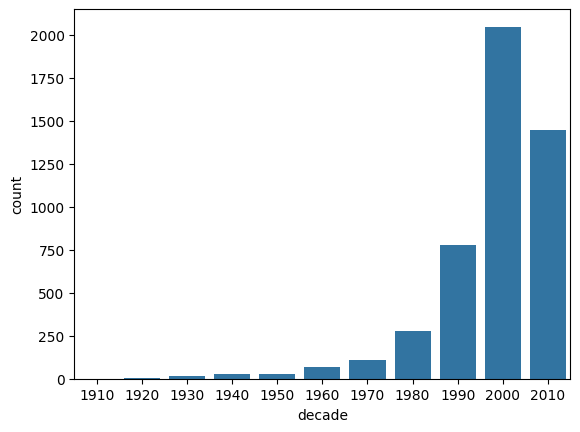

In [ ]:
sns.countplot(x='decade',data=df)


<Axes: xlabel='decade', ylabel='revenue'>

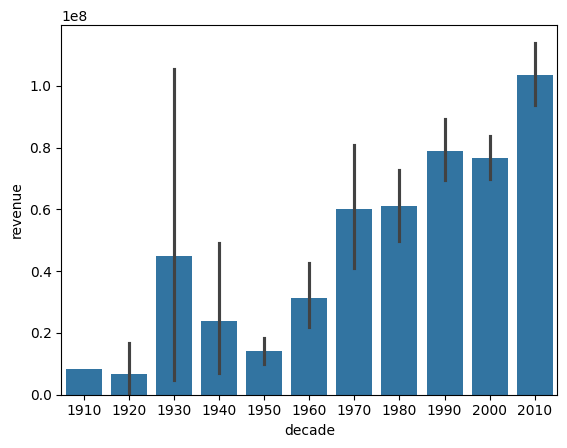

In [ ]:
sns.barplot(x='decade',y='revenue',data=df)


In [ ]:
df2=df[df["decade"] ==2010]


In [ ]:
top_10_revenue_2010=df2.sort_values(by="revenue", ascending=False).head(10)

<Axes: xlabel='revenue', ylabel='title'>

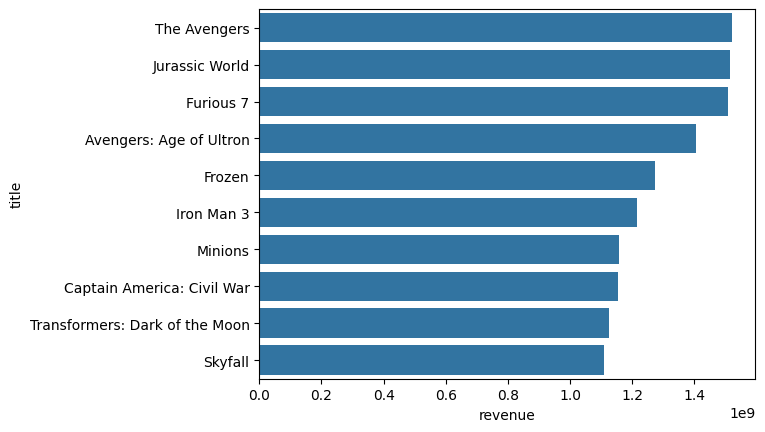

In [ ]:
sns.barplot(x='revenue',y='title',data=top_10_revenue_2010)

In [ ]:
%%sql
 create view movie_genre as
 select movies.title, genres.genre_name, movies.revenue,movies.budget,movies.popularity
 from movies
 join genremap on movies.movie_id = genremap.movie_id
 join genres on genremap.genre_id = genres.genre_id


 * sqlite://///content/drive/MyDrive/TMDB.db
Done.


[]

In [ ]:
x = %sql select * from movie_genre
df1 = pd.DataFrame(x)

 * sqlite://///content/drive/MyDrive/TMDB.db
Done.


In [ ]:
df1.head(2)

,title,genre_name,revenue,budget,popularity
0,Star Wars,Adventure,775398007.0,11000000,126.393695
1,The Fifth Element,Adventure,263920180.0,90000000,109.528572


<Axes: xlabel='revenue', ylabel='genre_name'>

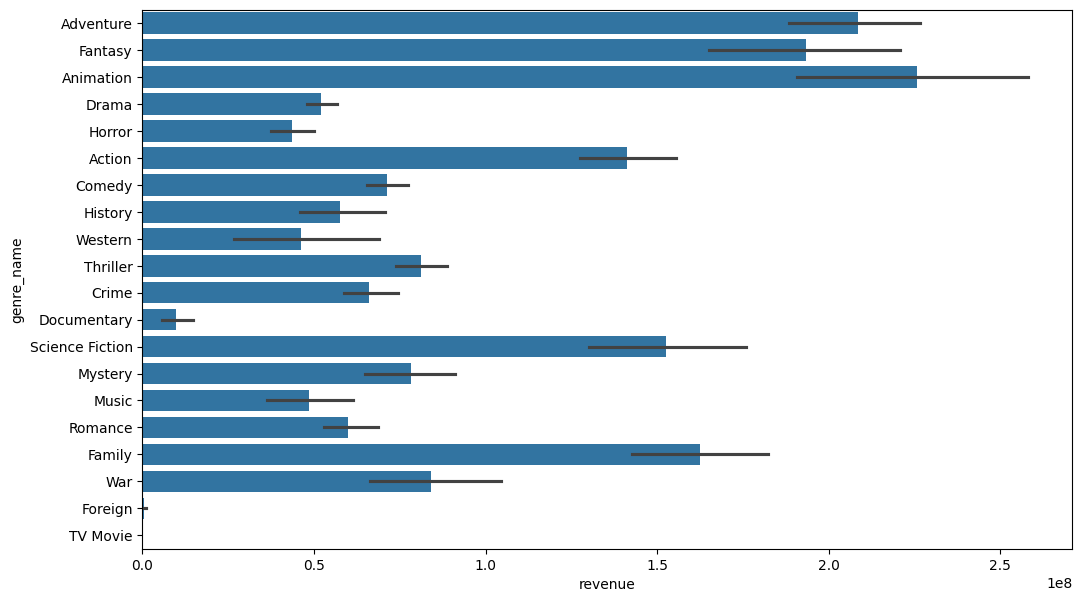

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='revenue',y='genre_name',data=df1)

The high genre earn is Animation then Adventure.

In [ ]:
top_10_revenue_movie=df.sort_values(by="revenue", ascending=False).head(10)

In [ ]:
top_10_revenue_movie

,movie_id,title,release_date,budget,original_language,original_title,overview,popularity,revenue,runtime,release_status,vote_average,vote_count,decade
2702,19995,Avatar,2009-12-10 00:00:00.000000,237000000,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2.787965e+09,162.0,Released,7.2,11800,2000
256,597,Titanic,1997-11-18 00:00:00.000000,200000000,en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,1.845034e+09,194.0,Released,7.5,7562,1990
2861,24428,The Avengers,2012-04-25 00:00:00.000000,220000000,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,1.519558e+09,143.0,Released,7.4,11776,2010
4108,135397,Jurassic World,2015-06-09 00:00:00.000000,150000000,en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,1.513529e+09,124.0,Released,6.5,8662,2010
4204,168259,Furious 7,2015-04-01 00:00:00.000000,190000000,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,1.506249e+09,137.0,Released,7.3,4176,2010
3983,99861,Avengers: Age of Ultron,2015-04-22 00:00:00.000000,280000000,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,1.405404e+09,141.0,Released,7.3,6767,2010
4025,109445,Frozen,2013-11-27 00:00:00.000000,150000000,en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,1.274219e+09,102.0,Released,7.3,5295,2010
3704,68721,Iron Man 3,2013-04-18 00:00:00.000000,200000000,en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,1.215440e+09,130.0,Released,6.8,8806,2010
4327,211672,Minions,2015-06-17 00:00:00.000000,74000000,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,1.156731e+09,91.0,Released,6.4,4571,2010
4519,271110,Captain America: Civil War,2016-04-27 00:00:00.000000,250000000,en,Captain America: Civil War,"Following the events of Age of Ultron, the col...",198.372395,1.153304e+09,147.0,Released,7.1,7241,2010


### **Avatar has grossed the most money of any movie ever. **

In [ ]:
top_10_revenue_movie["t"]

<Axes: xlabel='budget', ylabel='revenue'>

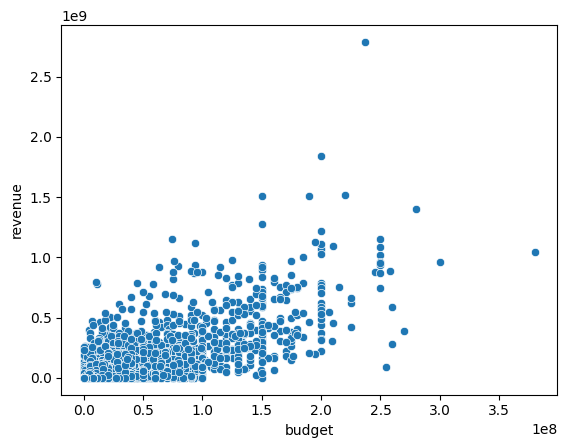

In [ ]:
sns.scatterplot(x='budget',y='revenue',data=df)


In [ ]:
inclode_colums=["revenue","budget","popularity","vote_average","decade"]
df_subset = df[inclode_colums]

<Axes: >

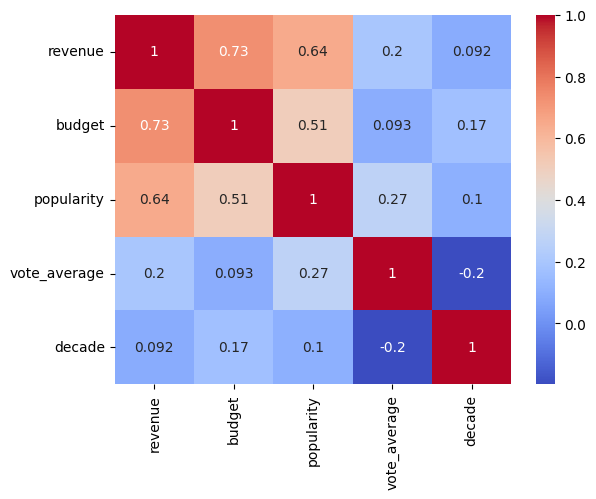

In [ ]:
sns.heatmap(df_subset.corr(),annot=True,cmap="coolwarm")

In [ ]:
top_10_pop_movie=df.sort_values(by="popularity", ascending=False).head(10)

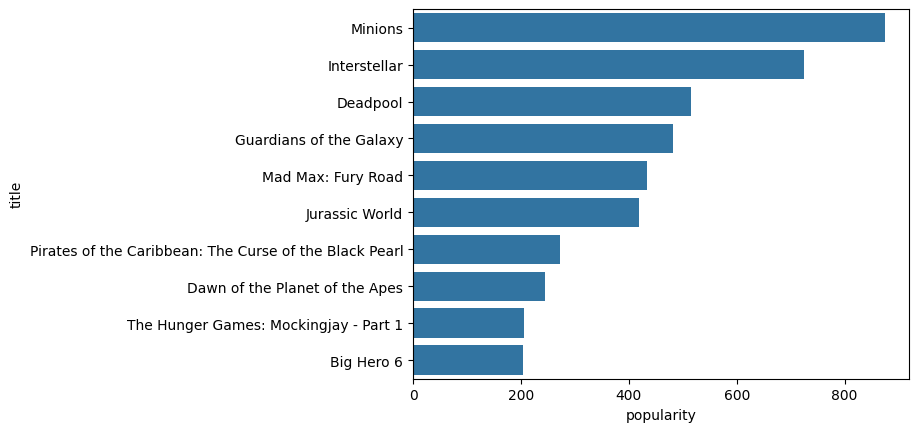

In [ ]:

sns.barplot(x='popularity',y='title',data=top_10_pop_movie)

plt.show()

### ** In conclsion if you want to make a popular moive ,you should make a simple formulae of comedy, family,  ,anime and adventure which is seen clearly in the Minions and Big hearo 6
